# Practice Session 01+02: Data preparation

Data scientists [spend a big chunk of their time preparing data](https://blog.ldodds.com/2020/01/31/do-data-scientists-spend-80-of-their-time-cleaning-data-turns-out-no/) and this is one of the first steps in any data mining project. This step is normally called **data preparation**.

The processes of getting an initial understanding of a dataset and preparing it usually go hand-in-hand, and it is critical to perform them well to obtain valid results later. Plus, you can save time and effort by learning how to do proper data preparation.

In this session, we will assume you just received a new dataset and need to do some initial steps with it:

1) Exploratory Data Analysis

* Calculate basis statistics as mean, median, variance, maximum and minimum
* Look at distributions, identify outliers
* Calculate correlations between variables

2) Feature engineering:

* Deal with missing values
* Standardize all numerical columns
* Convert categorical columns to dummy binary variables
* Date and period management
* Feature generation

*Tip*: This process has several steps. It is tempting to maintain a single variable throughout the entire cleaning process, and do something like `x = x.step1()` then `x = x.step2()`. This will create problems for you because if you go back and re-execute a cell it might fail to operate on already transformed data. A better approach in cases like this where you do not have memory problems, is to do `x1 = x.step1()`, `x2 = x1.step2()` and so on, i.e., create a new variable after each transformation or set of transformations.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

Author: <font color="blue">Luca Franceschi</font>

E-mail: <font color="blue">luca.franceschi01@estudiant.upf.edu</font>

Date: <font color="blue">4/10/2024</font>

# 0. The dataset

The dataset, contained in `device_db.csv` is a 10000 registers of mobile device purchases around 2019. **Each record in the dataset describes a customer that buys a new mobile telephone**. The attributes are defined as follows:
 
0. PURCHASED_DEVICE: the mobile phone bought by the customer
1. DEVICE_VALUE: the cost of the mobile phone bought by the customer
2. LAST_DEVICE_DATE: the date of the previous mobile device purchase
3. DATA\_TRAFFIC\_MONTH_(1..6): The Mbps of data traffic in the month (-1...-6) used by the customer previous to the mobile device purchase
4. VOICE\_TRAFFIC\_MONTH_(1..6): The minutes of voice traffic in the month (-1...-6) used by the customer previous to the mobile device purchase
5. BILLING\_MONTH\_(1..6): Billing (USD) in the month (-1...-6) paid by the customer previous to the mobile device purchase
6. DEVICE\_COST\_MONTH_(1..6): Monthly cost (USD) associated to the mobile device finance in the month (-1...-6) paid by the customer previous to the mobile device purchase: proportion of owner-occupied units built prior to 1940
7. LINE\_ACTIVATION\_DATE: Date of the activation of the mobile line by the customer
8. MONTHS\_LAST\_DEVICE: Number of months of the previous mobile device
9. DURATION\_LINE: Number of months since the customer contracted the mobile line
10. PREVIOUS\_DEVICE\_MODEL: Model of the previous mobile phone
11. PREVIOUS\_DEVICE\_MANUF: Manufacturer of the previous mobile phone
12. PREVIOUS\_DEVICE\_BRAND: Brand of the previous mobile phone

This dataset will be used in next practices as recommendation engines.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

# 1. Exploratory data analysis 

Exploratory Data Analysis (EDA) allows to us to have an understanding of the dataset from a stadistics perspective, i.e., data distribution and correlation between variables. This is crucial to select the most relevant variables for some purpose.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [58]:
import pandas as pd
import seaborn as sns
import datetime

import numpy as np
from numpy import array
from numpy import argmax

import matplotlib.pyplot as plt
from matplotlib import pyplot

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

We open the csv file contaning the data using separator ";" and assign to a dataframe (use `read_csv` from the Pandas library).

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [59]:
# LEAVE AS-IS

input_dataset = pd.read_csv("device_db.csv", sep=",")

## 1.1. Data types and simple statistics

<font size="+1" color="red">Replace this cell with your code to print the dataset header (column names) and the first five rows of data.</font>

In [60]:
display(input_dataset.head(5))

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P1769/07,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,12.00,20041220.00,NaN,172.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P1769/07,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,0.00,20170405.00,20.00,20.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,0.00,20040412.00,NaN,176.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P1769/07,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,6.00,20110825.00,14.00,88.00,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,0.00,20140617.00,-1.00,54.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


There are many ways of creating a data frame. Above, we created it by reading a file, but one can also create a dataframe from scratch, using an array of dictionaries. Example:

```python
countries = []
countries.append({'capital': 'Београд', 'country': 'Република Србија'})
countries.append({'capital': 'Nairobi', 'country': 'Jamhuri ya Kenya'})
countries_df = pd.DataFrame(countries, columns=['country', 'capital'])
display(countries_df)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

Create a dataframe named `column_type_df` containing the name of each column, its type and the number of distinct elements in that column. To iterate through the columns of dataframe `df`, use `for column in df.columns`; to determine the type of a column, use `df[column].dtype`; to retrieve the number of distinct elements of that column, use `df[column].nunique()`; to retrieve the size of a column, use `df[column].size`.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to create and display a dataframe containing one row per column, and with the following fields: name of the column, type, number of distinct elements, and size. The size of all columns should be equal.</font>

In [61]:
column_type = []
for column in input_dataset.columns:
    column_type.append({'name': column, 'type': input_dataset[column].dtype,
                        'distinct': input_dataset[column].nunique(), 'size': input_dataset[column].size})
column_type_df = pd.DataFrame(column_type, columns=['name', 'type', 'distinct', 'size'])
display(column_type_df)

,name,type,distinct,size
0,PURCHASED_DEVICE,object,101,10000
1,DEVICE_VALUE,float64,368,10000
2,LAST_DEVICE_CHANGE,float64,76,10000
3,DATA_TRAFFIC_MONTH_1,float64,7215,10000
4,DATA_TRAFFIC_MONTH_2,float64,7182,10000
5,DATA_TRAFFIC_MONTH_3,float64,7176,10000
6,DATA_TRAFFIC_MONTH_4,float64,7124,10000
7,DATA_TRAFFIC_MONTH_5,float64,7173,10000
8,DATA_TRAFFIC_MONTH_6,float64,7074,10000
9,VOICE_TRAFFIC_MONTH_1,float64,3550,10000


To obtain a **series** (column) from a dataframe you can reference an attribute by name, e.g., `input_dataset.DEVICE_VALUE` returns the series of all device values.

On a series, you can use functions from [numpy](https://numpy.org/doc/) such as `np.mean`, `np.median`, `np.std`, `np.min` and `np.max`; meanings are self-explanatory. These functions have equivalents `np.nanmean`, `np.nanmedian`, and so on that ignore NaN (not-a-number) values.

To display floats using two decimals, you can use:

```python
pd.options.display.float_format = '{:.2f}'.format
```


<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to create and display a dataframe containing one row per each column of type ``float64`` in the input data, and with the following fields: name of the column, mean, median, min, max -- all computed ignoring NaN values.</font>

In [62]:
basic_descriptors = []

for col in column_type_df[column_type_df.type=='float64'].name:
    series = input_dataset[col]
    basic_descriptors.append({'name': col, 'mean': np.nanmean(series), 'median': np.nanmedian(series), 'min': np.nanmin(series), 'max': np.nanmax(series)})

basic_descriptors_df = pd.DataFrame(basic_descriptors, columns=['name', 'mean', 'median', 'min', 'max'])
pd.options.display.float_format = '{:.2f}'.format
display(basic_descriptors_df)

,name,mean,median,min,max
0,DEVICE_VALUE,750.48,393.00,15.00,9057.00
1,LAST_DEVICE_CHANGE,20166984.77,20170601.00,20121001.00,20190501.00
2,DATA_TRAFFIC_MONTH_1,3481.83,1208.73,0.00,127017.59
3,DATA_TRAFFIC_MONTH_2,3649.96,1294.95,0.00,111948.84
4,DATA_TRAFFIC_MONTH_3,3653.43,1310.67,0.00,111948.84
5,DATA_TRAFFIC_MONTH_4,3269.44,1176.54,0.00,87856.41
6,DATA_TRAFFIC_MONTH_5,3673.37,1287.09,0.00,121834.81
7,DATA_TRAFFIC_MONTH_6,3427.69,1277.12,0.00,90550.61
8,VOICE_TRAFFIC_MONTH_1,154.85,84.05,0.00,4220.10
9,VOICE_TRAFFIC_MONTH_2,142.57,74.90,0.00,3132.10


The `describe` function can be used to describe a series. To invoke it simply do `input_dataset.DEVICE_VALUE.describe()`

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to print each column name and then use the `describe` function to print statistics for that column. Include a blank line after each description.</font>

In [63]:
for col in column_type_df.name:
    print(input_dataset[col].describe())
    print()

count                                                      9853
unique                                                      101
top       TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P1769/07
freq                                                       5379
Name: PURCHASED_DEVICE, dtype: object

count   9690.00
mean     750.48
std      979.71
min       15.00
25%      297.00
50%      393.00
75%      609.00
max     9057.00
Name: DEVICE_VALUE, dtype: float64

count       7682.00
mean    20166984.77
std        10925.77
min     20121001.00
25%     20160801.00
50%     20170601.00
75%     20171001.00
max     20190501.00
Name: LAST_DEVICE_CHANGE, dtype: float64

count     8868.00
mean      3481.83
std       6364.54
min          0.00
25%         51.92
50%       1208.73
75%       4249.16
max     127017.59
Name: DATA_TRAFFIC_MONTH_1, dtype: float64

count     8841.00
mean      3649.96
std       6444.36
min          0.00
25%         46.54
50%       1294.95
75%       4546.06
max     111948.84
Name: D

In [64]:
input_dataset['DURATION_LINE'].size - input_dataset['DURATION_LINE'].isna().sum()

np.int64(9179)

<font size="+1" color="red">Replace this cell with a brief commentary comparing the previous results for **DURATION_LINE** (time that the customer has had a line) with the ones from the `describe` function.</font>

<font size="+1" color="red">Indicate all the differences between the statistics that `describe` computed, and the statistics you computed (e.g., missing or extra computations).</font>

The decribe function makes also quartiles, not only the median (2nd quartile). Also includes standard deviation. The count function also works differently, since its value is, in our manual computation, `size - count(NaN)`. However the describe function does not take into account distinct values.

## 1.2. Inventory of device models

In exploratory data analysis, it is very useful to do an **inventory** or **census** of the possible values of a variable. For us, a census will be a frequency table in which you show the possible values of a variable, and their frequency, in decreasing order of frequency.



<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to display a census of PREVIOUS_DEVICE_MODEL and PREVIOUS_DEVICE_BRAND. You should create and display a dataframe in each case.</font>

In [65]:
pd.options.display.float_format = '{:.2%}'.format

pdm_frequency = pd.DataFrame(input_dataset.PREVIOUS_DEVICE_MODEL.value_counts(normalize=True))  \
    .reset_index(drop=False)                                                        \
    .rename(columns={'PREVIOUS_DEVICE_MODEL': 'Previous_Device_Model', 'proportion': 'Frequency'})

display(pdm_frequency.head(10))

,Previous_Device_Model,Frequency
0,iPhone 7,6.89%
1,iPhone 6,4.05%
2,Samsung Galaxy J5,3.94%
3,iPhone 6S,3.44%
4,Samsung Galaxy J1 Mini,3.31%
5,iPhone 5S,3.02%
6,iPhone 7 Plus,2.93%
7,Samsung Galaxy J1 2016,2.35%
8,Alcatel Pixi 3 3.5,2.17%
9,Moto G4 Play,1.64%


In [66]:
pd.options.display.float_format = '{:.2%}'.format

pdb_frequency = pd.DataFrame(input_dataset.PREVIOUS_DEVICE_BRAND.value_counts(normalize=True))  \
    .reset_index(drop=False)                                                    \
    .rename(columns={'PREVIOUS_DEVICE_BRAND': 'Previous_Device_Brand', 'proportion': 'Frequency'})

display(pdb_frequency)

,Previous_Device_Brand,Frequency
0,Samsung,30.43%
1,Outros,25.81%
2,Apple,25.09%
3,Motorola,10.34%
4,LG,8.33%


<font size="+1" color="red">The most common device model and the most common device brand do not match, why do you think it is so? Replace this cell with an explanation.</font>

It might be the case that the market cap of Samsung is greater than the Apple one because they have more device models, however they might not have a single device that was particularly well received by the market.

However it could also be that there is a ton of missing data regarding these columns that lead to this frequencies (e.g.: Samsung Previous_Device_Brand could always written whereas Apple products might be mostly NaN for some reason).

# 2. Feature engineering

Feature engineering is the process of extracting valuable features from the data. This requires pre-processing, combining, normalizing, and performing other operations on the values of some features.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

## 2.1. Missing values management

**Not A Number** (NaN) is a generic term to refer to *something that should be a number, but is not*. Usually, the value is either missing completely ("null") or contains the wrong type of object, such as a string or a concept such as infinity.

To find which columns contain NaN values, you can use the [isna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) function, as explained, e.g., [here](https://medium.com/dunder-data/finding-the-percentage-of-missing-values-in-a-pandas-dataframe-a04fa00f84ab). 

To display a column as percentages in a dataframe, you can use:

```python
df['column_name'] = df['column_name'].map('{:,.2%}'.format)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to print all columns that contain at least one NaN value, and what is the percentage of NaN values in that column. (Create a dataframe with this information, and then display it.)</font>

In [67]:
pd.options.display.float_format = '{:.2%}'.format

def display_NaN_Frequency(dataset):
    nan_info = []

    for col in dataset.columns:
        nan_info.append({'Column_Name': col, 'NaN_Frequency': dataset[col].isna().sum()/dataset[col].size})

    nan_info_pd = pd.DataFrame(nan_info, columns=['Column_Name', 'NaN_Frequency'])
    nan_info_pd = nan_info_pd[nan_info_pd.NaN_Frequency > 0].sort_values(by='NaN_Frequency', ascending=False)

    display(nan_info_pd) # in this case all columns contain at least one NaN value

display_NaN_Frequency(input_dataset)

,Column_Name,NaN_Frequency
30,PREVIOUS_DEVICE_MODEL,38.31%
32,PREVIOUS_DEVICE_BRAND,38.31%
31,PREVIOUS_DEVICE_MANUF,38.31%
28,MONTHS_LAST_DEVICE,23.18%
2,LAST_DEVICE_CHANGE,23.18%
14,VOICE_TRAFFIC_MONTH_6,14.65%
8,DATA_TRAFFIC_MONTH_6,14.65%
12,VOICE_TRAFFIC_MONTH_4,11.83%
6,DATA_TRAFFIC_MONTH_4,11.83%
4,DATA_TRAFFIC_MONTH_2,11.59%


The way **NaNs** are managed varies according to the meaning of each variable. In some occasions, registers should be removed, filled with other columns or calculated (imputed).

* To delete all rows containing a null value, we can use [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
* To replace null values, we can use [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

Please note that these steps should be applied sequentially, i.e., the output of one step should be fed into the next step. You can do, for instance: `df02 = df01.operation(...)` followed by `df03 = df02.operation(...)` and so on.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">If there is no **PURCHASED\_DEVICE**, **DEVICE\_VALUE**, or **PREVIOUS\_DEVICE\_MODEL**, the row is useless to us. Replace this cell with code to remove those rows.</font>

In [68]:
f'Initially we have {input_dataset.shape[0]} rows'

'Initially we have 10000 rows'

In [69]:
df02 = input_dataset.dropna(axis=0, subset=['PURCHASED_DEVICE', 'DEVICE_VALUE', 'PREVIOUS_DEVICE_MODEL'], how='any').copy()
f'Now we have {df02.shape[0]} rows'

'Now we have 5988 rows'

<font size="+1" color="red">Any NaN value in **DATA\_TRAFFIC\_MONTH\_(1..6)**, **VOICE\_TRAFFIC\_MONTH_(1..6)**, **BILLING\_MONTH_(1..6)**, or **DEVICE\_COST\_MONTH\_(1..6)** should be assumed to be 0. Replace this cell with code to do that imputation.</font>

In [70]:
pd.options.display.float_format = '{:.2%}'.format

df03 = df02.copy()
for i in range(1,7):
    df03.fillna({f'DATA_TRAFFIC_MONTH_{i}': 0}, inplace=True)
    df03.fillna({f'VOICE_TRAFFIC_MONTH_{i}': 0}, inplace=True)
    df03.fillna({f'BILLING_MONTH_{i}': 0}, inplace=True)
    df03.fillna({f'DEVICE_COST_MONTH_{i}': 0}, inplace=True)

# check NaN_Frequency
display_NaN_Frequency(df03)

,Column_Name,NaN_Frequency
2,LAST_DEVICE_CHANGE,23.61%
28,MONTHS_LAST_DEVICE,23.61%
27,LINE_ACTIVATION_DATE,7.82%
29,DURATION_LINE,7.82%


<font size="+1" color="red">If there is no **LINE\_ACTIVATION\_DATE**, we will assume it is equal to **LAST\_DEVICE\_CHANGE**. Replace this cell with code to do that imputation.</font>

In [71]:
df04 = df03.fillna({'LINE_ACTIVATION_DATE': df03['LAST_DEVICE_CHANGE']}).copy()

# check NaN_Frequency
pd.options.display.float_format = '{:.2%}'.format
display_NaN_Frequency(df04)

# looks good
pd.options.display.float_format = '{:.2f}'.format
# display(df03[df03.LINE_ACTIVATION_DATE.isna()].head(3))
# display(df04[df03.LINE_ACTIVATION_DATE.isna()].head(3))

,Column_Name,NaN_Frequency
2,LAST_DEVICE_CHANGE,23.61%
28,MONTHS_LAST_DEVICE,23.61%
29,DURATION_LINE,7.82%
27,LINE_ACTIVATION_DATE,2.07%


<font size="+1" color="red">Replace this cell with code to print the header and the first five rows after this processing</font>

In [72]:
display(df04.head(5))

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P1769/07,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,12.00,20041220.00,NaN,172.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P1769/07,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,0.00,20170405.00,20.00,20.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,0.00,20040412.00,NaN,176.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P1769/07,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,6.00,20110825.00,14.00,88.00,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,0.00,20140617.00,-1.00,54.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


If `df` is a dataframe, `df.shape` contains a tuple with the number of rows and the number of columns of the data frame. You should now print something like this:

```
Rows in the original dataset: M
Rows in the new dataset: N ((100*(M-N)/M)% less)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to print the number of rows of the original dataset, the number of rows of the new dataset, and the percentage of rows that were dropped, as well as the names of the columns that still contain NaN values, if any.</font>

In [73]:
r_orig = input_dataset.shape[0]
r_new = df04.shape[0]

print(f'Rows in the original dataset: {r_orig}')
print('Rows in the new dataset: {} ({:.2%} less)'.format(r_new, (r_orig-r_new)/r_orig))

pd.options.display.float_format = '{:.2%}'.format
display_NaN_Frequency(df04)

Rows in the original dataset: 10000
Rows in the new dataset: 5988 (40.12% less)


,Column_Name,NaN_Frequency
2,LAST_DEVICE_CHANGE,23.61%
28,MONTHS_LAST_DEVICE,23.61%
29,DURATION_LINE,7.82%
27,LINE_ACTIVATION_DATE,2.07%


## 2.2. Distributions, outliers, and correlations

We will now plot the distributions of some variables and apply some transformations.

* You can use [Seaborn library](https://seaborn.pydata.org/) with `kde=False` to create a histogram.
* You can use [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) with `kind='box'` to create a boxplot.

Remember to include a title, x-axis label, and y-axis label. All of your plots delivered throughout the course should include these elements. Example:

```
ax = sns.histplot(...)
ax.set(title=..., xlabel=..., ylabel=...)
```
    
<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to plot a histogram of **DEVICE\_VALUE** and **DURATION\_LINE**. Remember to include a title, and labels on the x axis and y axis</font>

<font size="+1" color="red">Include after each histogram a markdown cell where you indicate if you recognize any specific distribution (normal, exponential, uniform, ...) or any characteristic of the distribution (unimodal, bimodal).</font>

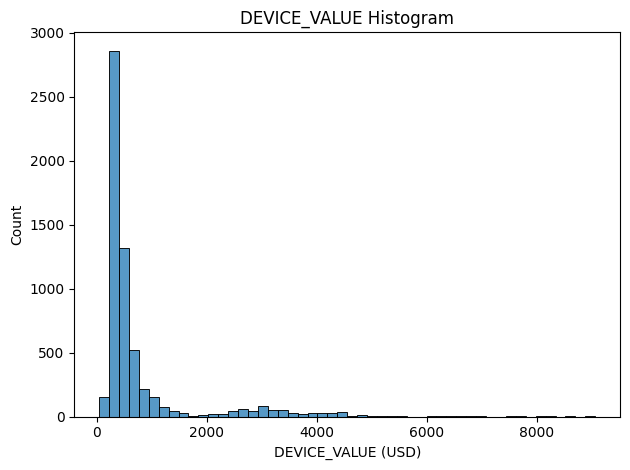

In [74]:
ax = plt.subplot()

ax.set(title='DEVICE_VALUE Histogram', xlabel='DEVICE_VALUE (USD)', ylabel='Count')
sns.histplot(df04.DEVICE_VALUE, kde=False, ax=ax, bins=50)

plt.tight_layout()
plt.show()

The device value seems to have an exponential decrease (from price $0 to around $2000), however there is an important amount of devices that seem to be normally distributed with cost around $3000. It may count as bimodal but I'm not quite sure.

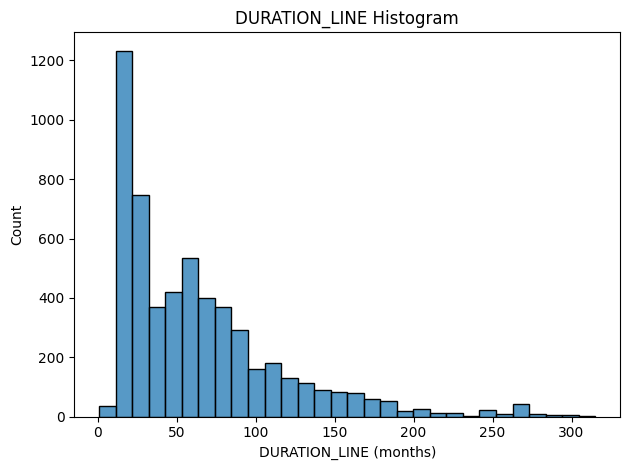

In [75]:
ax = plt.subplot()

ax.set(title='DURATION_LINE Histogram', xlabel='DURATION_LINE (months)', ylabel='Count')
sns.histplot(df04.DURATION_LINE, kde=False, ax=ax, bins=30)

plt.tight_layout()
plt.show()

The duration line histogram seems to be exponentially decreasing and also seems bimodal (peaks at bins 20 and 50, and a valley at around 40).

To be able to see better these histograms when comparing them, you can use:

```
sns.histplot(data=..., bins=20, fill=False)
```

To use logarithmic scale on the X axis or the Y axis, you can use `plt.xscale('log')` or `plt.yscale('log')`.
    
<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with a series of cells with code to plot a histogram comparing **VOICE\_TRAFFIC\_MONTH\_1** against **VOICE\_TRAFFIC\_MONTH\_6**, and **BILLING\_MONTH\_1** against **BILLING\_MONTH\_6**. Remember to include a title, labels on the x axis and y axis, and a legend.</font>

<font size="+1" color="red">Both plots should use logarithmic scale on the y axis</font>

<font size="+1" color="red">Include after both histograms your comment on the differences between month 1 and month 6.</font>

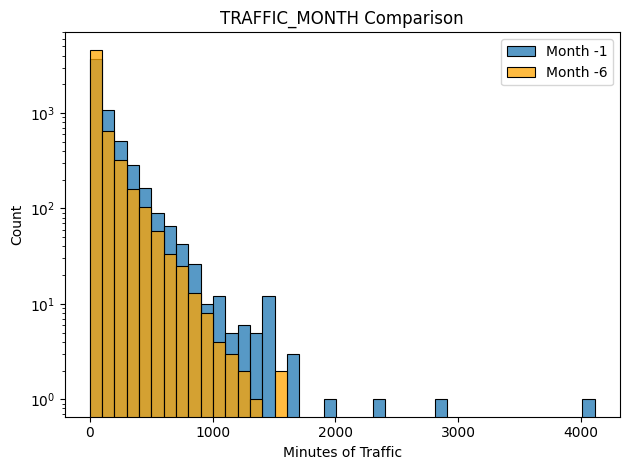

In [76]:
ax = plt.subplot()

ax.set(title='TRAFFIC_MONTH Comparison', xlabel='Minutes of Traffic', ylabel='Count')
sns.histplot(df04.VOICE_TRAFFIC_MONTH_1, kde=False, ax=ax, binwidth=100, label='Month -1')
sns.histplot(df04.VOICE_TRAFFIC_MONTH_6, kde=False, ax=ax, binwidth=100, color='orange', label='Month -6')

plt.legend()
plt.yscale('log')
plt.tight_layout()
plt.show()

Both distributions seem to be exponentially decreasing and unimodal, however there seems to be more traffic as time passes. In other words, the nearest the mobile purchase the more voice traffic.

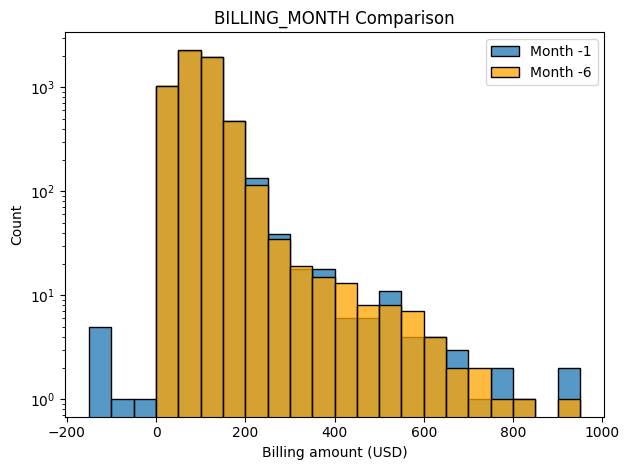

In [77]:
ax = plt.subplot()

ax.set(title='BILLING_MONTH Comparison', xlabel='Billing amount (USD)', ylabel='Count')
# sns.histplot(df04.BILLING_MONTH_1, kde=False, ax=ax, binwidth=50, label='Month -1')
# sns.histplot(df04.BILLING_MONTH_6, kde=False, ax=ax, binwidth=50, color='orange', label='Month -6')

# very ugly but it is a mess otherwise
sns.histplot(df04.BILLING_MONTH_1, kde=False, ax=ax, bins=range(-150, 1000, 50), label='Month -1')
sns.histplot(df04.BILLING_MONTH_6, kde=False, ax=ax, bins=range(-150, 1000, 50), color='orange', label='Month -6')

plt.legend()
plt.yscale('log')
plt.tight_layout()
plt.show()

Both distributions seem to follow some kind of unimodal F-distribution since the right-tail is quite longer than the left-tail. There is not a noticeable difference between those billing periods in my opinion. The only remark that could be important is that the month previous to the purchase of a mobile phone some clients were charged negatively (money returned). This could affect the decision of buying a new device.

Variables having exponential distribution can be processed and visualized better after transforming them, usually by applying the `log(x+1)` function (we want to avoid zeros, hence the +1).
    
<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to apply **log(x+1)** to **VOICE\_TRAFFIC\_MONTH\_1** and plot its new distribution.</font>

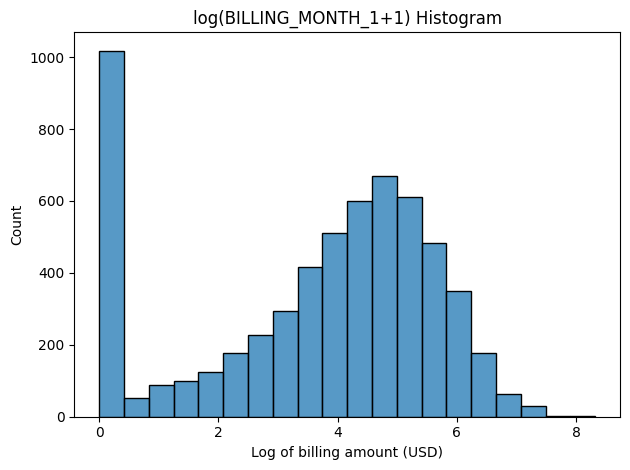

In [157]:
voice_transformed = np.log(df04.VOICE_TRAFFIC_MONTH_1 + 1)

ax = plt.subplot()

ax.set(title='log(BILLING_MONTH_1+1) Histogram', xlabel='Log of billing amount (USD)', ylabel='Count')
sns.histplot(voice_transformed, kde=False, ax=ax, bins=20)

plt.tight_layout()
plt.show()

We can see that the x-axis was now skrunk to a much more manageable range. All the extreme values (that could be outliers) are much more condensed in the right bins. An interesting byproduct of this transformation is that all the negative values are mapped to 0, thus creating a peak in the first bin.

<font size="+1" color="red">Replace this cell with code to create thre boxplots, each of them for one of the  variables **DATA\_TRAFFIC\_MONTH\_6**, **VOICE\_TRAFFIC\_MONTH\_6** and **BILLING\_MONTH\_6**. Remember to include a title and a label for the y axis.</font>

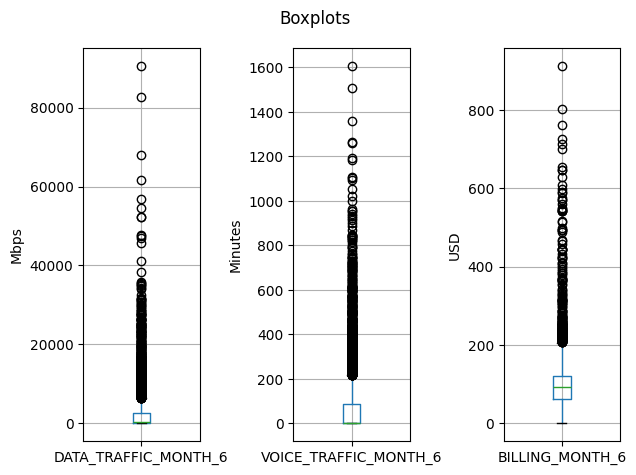

In [79]:
fig, axs = plt.subplots(1, 3)

fig.suptitle('Boxplots')

axs[0].set(ylabel='Mbps')
axs[1].set(ylabel='Minutes')
axs[2].set(ylabel='USD')

df04.boxplot('DATA_TRAFFIC_MONTH_6', ax=axs[0])
df04.boxplot('VOICE_TRAFFIC_MONTH_6', ax=axs[1])
df04.boxplot('BILLING_MONTH_6', ax=axs[2])

plt.tight_layout()
plt.show()

In [80]:
#TODO parameter to not show outliers

<font size="+1" color="red">Replace this cell with a brief commentary indicating which extreme values would you use as threshold for **outliers** in these variables, by looking at these box plots</font>

There seem to be a lot of outliers in all cases, all of them are "upper" outliers. I would identify as outliers all data points that exceed: 60000 Mbps in the DATA_TRAFFIC_MONTH_6 boxplot, 1000 minutes in the VOICE_TRAFFIC_MONTH_6, and around $600 for BILLING_MONTH_6.

In this dataset, there are many dependencies between different attributes, e.g., a large voice traffic will probably be associated with a large data traffic, a more expensive bill, and possibly a more expensive device (`DEVICE_VALUE`).

You can use [pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) to compute a correlation matrix, and [matplotlib.pyplot.matshow](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.matshow.html) to show this graphically.

To compute Pearson correlations, you use:

```python
df.corr(method='pearson', numeric_only=True)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to calculate the correlation between all traffic attributes (i.e., voice and data), duration line, billing, device cost and device value. Display the result as a table with rows and columns corresponding to columns, and cells indicating correlations. Display the result as an image using ``matshow``</font>

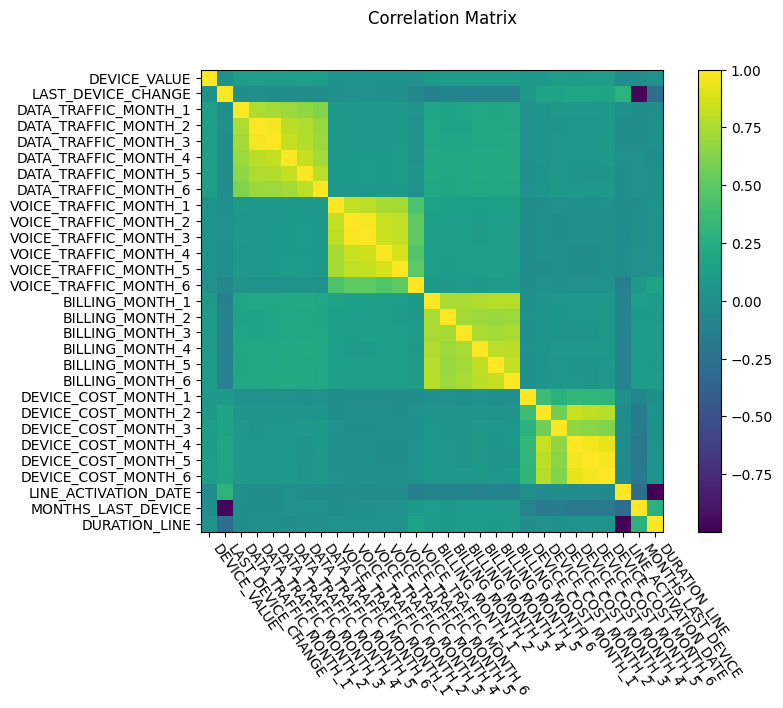

In [81]:
corr = df04.corr(method='pearson', numeric_only=True)

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)
cax = ax.matshow(corr)
cbar = fig.colorbar(cax)

ax.xaxis.set_tick_params(which='both', top=False, labeltop=False, bottom=True, labelbottom=True)
ax.set_xticks(range(0, corr.shape[0]), column_type_df[column_type_df.type == 'float64'].name.to_list(), rotation=360-55, ha='left')
ax.set_yticks(range(0, corr.shape[0]), column_type_df[column_type_df.type == 'float64'].name.to_list())

fig.suptitle('Correlation Matrix')
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on the results. Is the billing more correlated, in general, with the data traffic or with the voice traffic?</font>

We can see that there are many interesting correlations in this plot. The first thing that I've noticed is that all variables that have an index 1-6 are very positively correlated between them (all of them near the diagonal). Also there is a very negative correlation between MONTHS_LAST_DEVICE and LAST_DEVICE_CHANGE (the smaller the buy date, the larger the phone age), and also between DURATION_LINE and LINE_ACTIVATION_DATE (for the same reason).

It seems that the billing is, in general, more correlated to data traffic than to voice traffic (the color of the block 1-6 is brighter for data traffic than for voice traffic).

## 2.3. Date management and period calculation

First, we will determine the date of the `LAST_DEVICE_CHANGE` of the last device that was changed in the entire dataset (i.e., the maximum value of the `LAST_DEVICE_CHANGE` column, plus 30 days). We will refer to that date as `latest_change`.

Note that `LAST_DEVICE_CHANGE` is expressed as a floating point number in the format `YYYYMMDD.0`, for instance 3 of July of 2018 would be `20180703.0`. Convert to integer first, then to string.

As a string, this is formatted according to [strptime](https://www.geeksforgeeks.org/python-datetime-strptime-function/) conventions with format `%Y%m%d`.

Use [datetime.datetime.strptime](https://docs.python.org/3/library/datetime.html#datetime.datetime.strptime) to convert to create object `latest_change` and print it.

Next, add 30 days to that date to obtain object `now` (we will assume we are doing this processing 30 days after the latest device change). Use a `datetime.timedelta` object for that.

Your output should look like this:

```
2019-05-01 00:00:00
2019-05-31 00:00:00
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to create and print `latest_change` and `now`.</font>

In [82]:
latest_change = datetime.datetime.strptime(str(int(df04['LAST_DEVICE_CHANGE'].max())), '%Y%m%d')
now = latest_change + datetime.timedelta(30)
print(latest_change)
print(now)

2019-05-01 00:00:00
2019-05-31 00:00:00


Now, obtain the series corresponding to the last device change, you can do it by using [pandas.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) as if you were using `strptime`:

```
series_converted = pd.to_datetime(dataframe[column_name], format='%Y%m%d')
```

Now compute the difference between the now and the series_converted. 

Divide that difference by `30 * datetime.timedelta(days=1)` to obtain the difference in periods of 30 days (approximately one month).

Replace the `MONTHS_LAST_DEVICE` column with those differences. You may need to [fill the NaN with zeroes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html), and [convert to type](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) `int`.


<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code that replaces the **MONTHS_LAST_DEVICE** column to be equal to the difference, in periods of 30 days, between **LAST_DEVICE_CHANGE** and the `now` variable.</font>

In [83]:
series_converted = pd.to_datetime(df04['LAST_DEVICE_CHANGE'], format='%Y%m%d')
series_converted = (now - series_converted) / (30 * datetime.timedelta(days=1))

df05 = df04.copy()
df05['MONTHS_LAST_DEVICE'] = series_converted
df05.fillna({'MONTHS_LAST_DEVICE': 0}, inplace=True)
df05 = df05.astype({'MONTHS_LAST_DEVICE': 'int'})

<font size="+1" color="red">Replace this cell with code to update the **DURATION_LINE** value to be the difference, in days, between **LINE_ACTIVATION_DATE** and the `now` variable. Indicate the average of **DURATION_LINE** -- what is that in years, approximately?</font>

In [84]:
series_converted2 = pd.to_datetime(df04['LINE_ACTIVATION_DATE'], format='%Y%m%d')
series_converted2 = now - series_converted2

df06 = df05.copy()
df06['DURATION_LINE'] = series_converted2
print(f'The average line duration is about {df06['DURATION_LINE'].mean().days / 365:.2f} years')

The average line duration is about 5.34 years



## 2.4. Standarization and scaling of numerical variables

Scaling a series involves changing the values. Standardization involves ensuring that the mean is 0 and the standard deviation is 1, while min-max scaling requires that the maximum is 1, the minimum is 0, and all remaining values are linearly interpolated.

You can use [StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to standarize a variable, and [MinMaxScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to perform min-max scaling.

The following example shows how to use these:

```python
test_data = [{'x': -1.0}, {'x': 2.0}, {'x': 3.0}, {'x': 6.0}]
test_df = pd.DataFrame(test_data)
display(test_df)

test_df['x_standardized'] = StandardScaler().fit_transform(test_df[['x']])
test_df['x_minmaxscaled'] = MinMaxScaler().fit_transform(test_df[['x']])
display(test_df)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to standardize and min-max scale the **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1**, **BILLING_MONTH_1** and **DEVICE_COST_MONTH_1** columns. Save the results in new colums with the same name followed by **_STANDARD** and **_MINMAX** (e.g., DATA\_TRAFFIC\_MONTH\_1\_STAND, DATA\_TRAFFIC\_MONTH\_1\_MINMAX). Plot a histogram for each new variable.</font>

In [85]:
df07 = df06.copy()

df07['VOICE_TRAFFIC_MONTH_1_STANDARD'] = StandardScaler().fit_transform(df07[['VOICE_TRAFFIC_MONTH_1']])
df07['BILLING_MONTH_1_STANDARD'] = StandardScaler().fit_transform(df07[['BILLING_MONTH_1']])
df07['DEVICE_COST_MONTH_1_STANDARD'] = StandardScaler().fit_transform(df07[['DEVICE_COST_MONTH_1']])

df07['VOICE_TRAFFIC_MONTH_1_MINMAX'] = MinMaxScaler().fit_transform(df07[['VOICE_TRAFFIC_MONTH_1']])
df07['BILLING_MONTH_1_MINMAX'] = MinMaxScaler().fit_transform(df07[['BILLING_MONTH_1']])
df07['DEVICE_COST_MONTH_1_MINMAX'] = MinMaxScaler().fit_transform(df07[['DEVICE_COST_MONTH_1']])

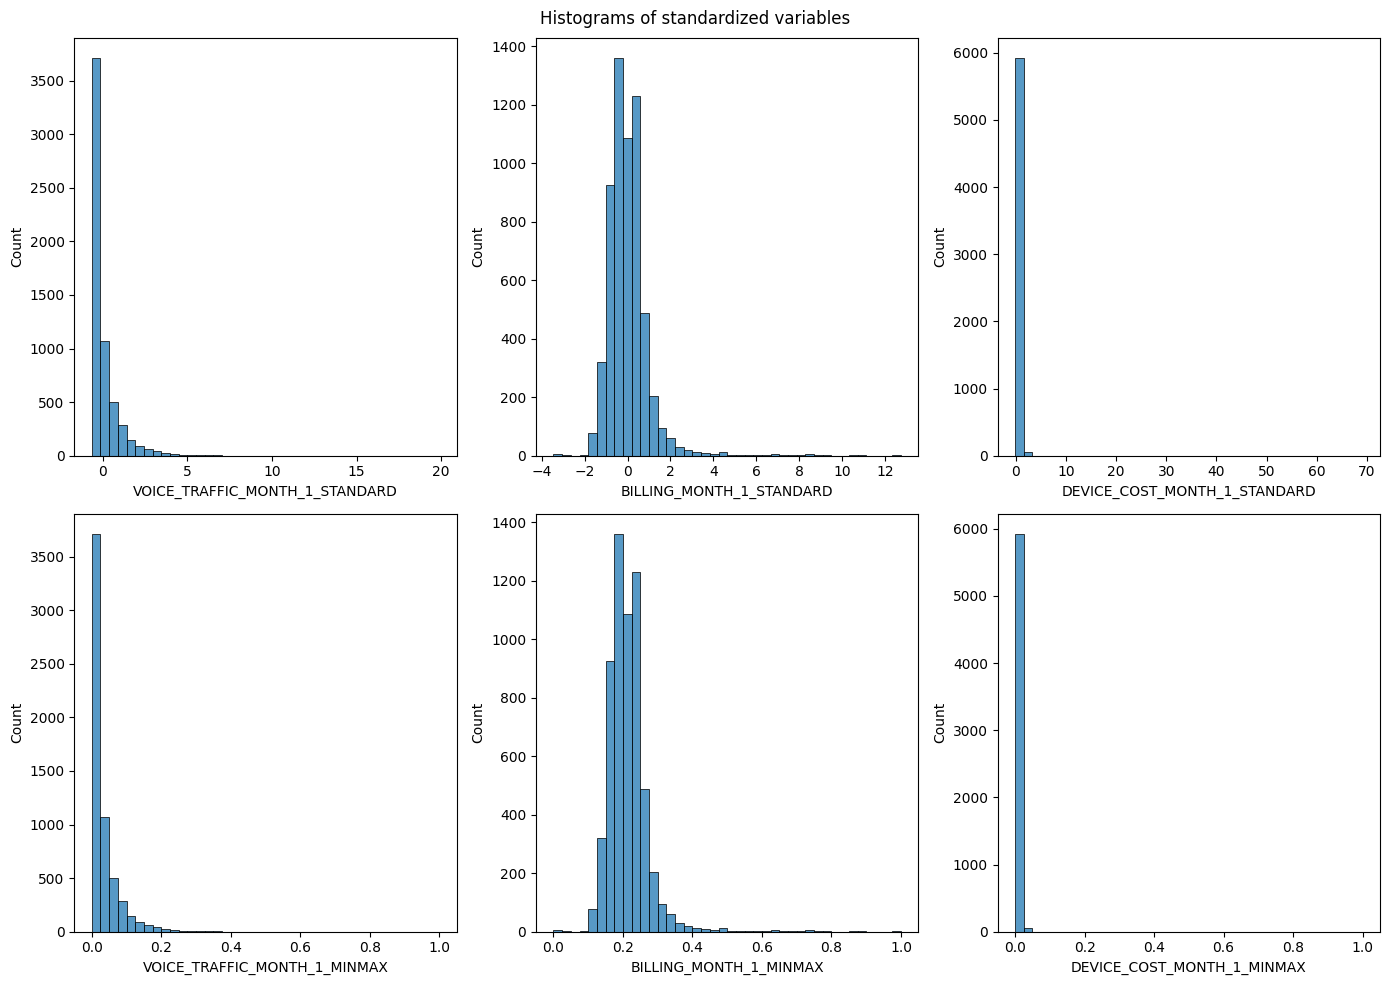

In [133]:
fig, axs = plt.subplots(2,3, figsize=(14,10))
axs = axs.flatten()

selection = ['VOICE_TRAFFIC_MONTH_1_STANDARD', 'BILLING_MONTH_1_STANDARD', 'DEVICE_COST_MONTH_1_STANDARD', 'VOICE_TRAFFIC_MONTH_1_MINMAX', 'BILLING_MONTH_1_MINMAX', 'DEVICE_COST_MONTH_1_MINMAX']

for i, sel in enumerate(selection):
    sns.histplot(df07[sel], kde=False, ax=axs[i], bins=40)

fig.suptitle('Histograms of standardized variables')
plt.tight_layout()
plt.show()

## 2.5. Convert categorical columns to dummy binary variables

Categorical variables usually need to be transformed into numerical values to apply some machine learning methods.

Use [LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to transform a categorical variable to integer values. Example:

```python
colors_data = [{'color': 'Blue'}, {'color': 'Red'}, {'color': 'Orange'},
               {'color': 'Blue'}, {'color': 'Orange'}, {'color': 'Blue'}]
colors_df = pd.DataFrame(colors_data, columns=['color'])

colors_df['colors_int_encoded'] = LabelEncoder().fit_transform(colors_df['color'])
display(colors_df)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Create variable **PREVIOUS_DEVICE_BRAND_INT_ENCODED** containing an integer encoding of variable **PREVIOUS_DEVICE_BRAND**.</font>

In [87]:
df08 = df07.copy()
df08['PREVIOUS_DEVICE_BRAND_INT_ENCODED'] = LabelEncoder().fit_transform(df08['PREVIOUS_DEVICE_BRAND'])

You can use [get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) to convert a categorical variable to multiple columns using one-hot encoding. Example:

```
colors_data = [{'color': 'Blue'}, {'color': 'Red'}, {'color': 'Orange'},
               {'color': 'Blue'}, {'color': 'Orange'}, {'color': 'Blue'}]
colors_df = pd.DataFrame(colors_data, columns=['color'])

color_dummies = pd.get_dummies(colors_df['color'], prefix='color_')
colors_df_with_dummies = colors_df.join(color_dummies)
display(colors_df_with_dummies)
```


<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to convert **PREVIOUS_DEVICE_MANUF** to dummy binary variables.</font>

In [88]:
df08_dummies = df08.join(pd.get_dummies(df08['PREVIOUS_DEVICE_MANUF'], prefix='manuf'))

## 2.6. Feature generation

In the current dataset we have a historic of 6 months for data traffic, voice traffic, billing and device cost. Feature generation consists of creating new attributes from the current dataset that can help us to create, e.g., better predictive models.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to create from the 6 months of **DATA_TRAFFIC\_MONTH\_[1-6]**, **VOICE_TRAFFIC\_MONTH\_[1-6]**, **BILLING\_MONTH\_[1-6]** and **DEVICE_COST\_MONTH\_[1-6]**, new columns with the mean, maximum, minimum, range (i.e., difference between maximum and minimum) for each element. For instance, column **DATA_TRAFFIC_MEAN** should contain the average of these six numbers: **DATA_TRAFFIC_MONTH_1**, **DATA_TRAFFIC_MONTH_2**, ..., **DATA_TRAFFIC_MONTH_6**.</font>

In [89]:
df09 = df08_dummies.copy()

df09['DATA_TRAFFIC_MONTH_MEAN'] = df09[['DATA_TRAFFIC_MONTH_' + str(i) for i in range(1,7)]].mean(axis=1)
df09['DATA_TRAFFIC_MONTH_MAX'] = df09[['DATA_TRAFFIC_MONTH_' + str(i) for i in range(1,7)]].max(axis=1)
df09['DATA_TRAFFIC_MONTH_MIN'] = df09[['DATA_TRAFFIC_MONTH_' + str(i) for i in range(1,7)]].min(axis=1)
df09['DATA_TRAFFIC_MONTH_RANGE'] = df09['DATA_TRAFFIC_MONTH_MAX'] - df09['DATA_TRAFFIC_MONTH_MIN']

df09['VOICE_TRAFFIC_MONTH_MEAN'] = df09[['VOICE_TRAFFIC_MONTH_' + str(i) for i in range(1,7)]].mean(axis=1)
df09['VOICE_TRAFFIC_MONTH_MAX'] = df09[['VOICE_TRAFFIC_MONTH_' + str(i) for i in range(1,7)]].max(axis=1)
df09['VOICE_TRAFFIC_MONTH_MIN'] = df09[['VOICE_TRAFFIC_MONTH_' + str(i) for i in range(1,7)]].min(axis=1)
df09['VOICE_TRAFFIC_MONTH_RANGE'] = df09['VOICE_TRAFFIC_MONTH_MAX'] - df09['VOICE_TRAFFIC_MONTH_MIN']

df09['BILLING_MONTH_MEAN'] = df09[['BILLING_MONTH_' + str(i) for i in range(1,7)]].mean(axis=1)
df09['BILLING_MONTH_MAX'] = df09[['BILLING_MONTH_' + str(i) for i in range(1,7)]].max(axis=1)
df09['BILLING_MONTH_MIN'] = df09[['BILLING_MONTH_' + str(i) for i in range(1,7)]].min(axis=1)
df09['BILLING_MONTH_RANGE'] = df09['BILLING_MONTH_MAX'] - df09['BILLING_MONTH_MIN']

df09['DEVICE_COST_MONTH_MEAN'] = df09[['DEVICE_COST_MONTH_' + str(i) for i in range(1,7)]].mean(axis=1)
df09['DEVICE_COST_MONTH_MAX'] = df09[['DEVICE_COST_MONTH_' + str(i) for i in range(1,7)]].max(axis=1)
df09['DEVICE_COST_MONTH_MIN'] = df09[['DEVICE_COST_MONTH_' + str(i) for i in range(1,7)]].min(axis=1)
df09['DEVICE_COST_MONTH_RANGE'] = df09['DEVICE_COST_MONTH_MAX'] - df09['DEVICE_COST_MONTH_MIN']

<font size="+1" color="red">Replace this cell with code create an additional column **DEVICE_COST_TO_BILLING_RATIO** containing the ratio between **DEVICE_COST_MEAN** and **BILLING_MEAN** and plot its distribution.</font>

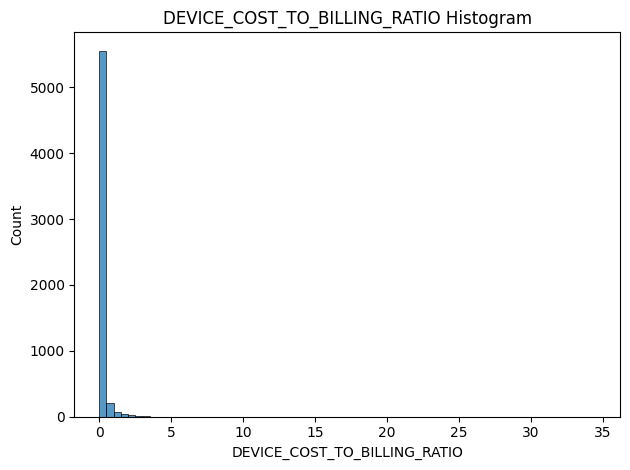

In [90]:
df10 = df09.copy()

df10['DEVICE_COST_TO_BILLING_RATIO'] = df10['DEVICE_COST_MONTH_MEAN'] / df10['BILLING_MONTH_MEAN']

ax = plt.subplot()

ax.set(title='DEVICE_COST_TO_BILLING_RATIO Histogram', xlabel='', ylabel='Count')
sns.histplot(df10['DEVICE_COST_TO_BILLING_RATIO'], kde=False, ax=ax, binwidth=0.5)

plt.tight_layout()
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on the distribution of the variable **DEVICE_COST_TO_BILLING_RATIO**. Can you recognize its distribution?</font>

This seems to be an exponentially decreasing distribution, however it has a very long right-tail, thus making this histogram look very weird. We could probably get a better visualization by plotting the `log(x+1)` histogram. What this plot is basically telling us is that, for most of the entries of the dataset, either the device cost is very low or the billing cost is very high (in comparison).

## 2.7. Text parsing/processing

In machine learning, text processing is a very useful tool that can be used to improve datasets. In some use cases, for instance customer care applications using digital channels as Whatsapp, Facebook, etc..., data scientist teams mainly work with text data.

One of the text processing technique is to extract concrete words or tokens from a sentence or documents. Regular expressions are a great tool to extract data trough these patterns.

In this dataset, note that **PURCHASED_DEVICE** is a variable that is formed by a "**device_code**"+"**_**"+"**manufacture name**"+"**  **"+"**device model**". We want to split this variable into its components.

Tip: use [str.split](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html) to separate a string into several parts.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to use the **PURCHASED_DEVICE** variable to create 3 new columns with the following variables names: **PURCHASED_DEVICE_CODE**, **PURCHASED_DEVICE_MANUFACTURER** and **PURCHASED_DEVICE_MODEL**.</font>

In [91]:
df11 = df10.copy()
pd.set_option('display.max_colwidth', None)
display(df11['PURCHASED_DEVICE'].head(5))

0    TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P1769/07
1    TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P1769/07
2           TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO
3    TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P1769/07
4           TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO
Name: PURCHASED_DEVICE, dtype: object

In [92]:
# display(df11['PURCHASED_DEVICE'].str.extract(r'(.*)_(.*)\*\* \*\*(.*)', expand=True).head(5))
tmp = df11['PURCHASED_DEVICE'].str.split('_| ', n=2, expand=True) \
        .rename(columns={0: 'PURCHASED_DEVICE_CODE', 1: 'PURCHASED_DEVICE_MANUFACTURER', 2: 'PURCHASED_DEVICE_MODEL'})

# avoid doing the join operation multiple times
if 'PURCHASED_DEVICE_CODE' not in df11.columns:
    df11 = df11.join(tmp)

display(df11[['PURCHASED_DEVICE_CODE', 'PURCHASED_DEVICE_MANUFACTURER', 'PURCHASED_DEVICE_MODEL']])

,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
0,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
1,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
2,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
3,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
4,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
...,...,...,...
9994,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9995,TGMO36762000,MOTOROLA,XT1941 SMARTPHONE PRETO
9996,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9997,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07


<font size="+1" color="red">Replace this cell with code to create two tables: one with the number of devices per manufacturer in **PURCHASED_DEVICE_MANUFACTURER** and one with the number of devices per manufacturer in  **PREVIOUS_DEVICE_MANUF**.

In [93]:
table1 = df11['PURCHASED_DEVICE_MANUFACTURER'].value_counts().reset_index()
table2 = df11['PREVIOUS_DEVICE_MANUF'].value_counts().reset_index()

display(table1)
display(table2)

,PURCHASED_DEVICE_MANUFACTURER,count
0,LG,3556
1,SAMSUNG,1094
2,MOTOROLA,630
3,APPLE,448
4,ALCATEL,258
5,ASUS,2


,PREVIOUS_DEVICE_MANUF,count
0,Samsung Korea,1879
1,Apple Inc,1495
2,"Motorola Mobility LLC, a Lenovo Company",849
3,LG Electronics Inc.,506
4,TCL Communication Ltd,279
...,...,...
62,u-blox AG,1
63,Mundo Reader S.L.,1
64,Topmax Glory Limited,1
65,HK Elephone Communication Tech Co Limited,1


## 2.8. Splitting and sampling a dataset

Splitting and sampling dataset are techniques that distribute the original dataset in n-parts. One of the most interesting application of these tools is to separate the dataset to train and test a machine learning model. Meanwhile sampling guarantees same type of data (i.e. distributions), splitting will separate the dataset with the ratio we need. Usually, 80%-20% or 70%-30% splitting ratios are the most common used.

Once again, Sklearn library helps to us to cover this necessity through the function [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) which splits a dataset into two parts, which usually will be used for training and testing.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to split the dataset in two separate datasets: one with 70% of the rows and the other with 30% of rows</font>

In [94]:
seed = 1
train, test = train_test_split(df11, train_size=70, test_size=30, random_state=seed)

<font size="+1" color="red">Replace this cell with code to compute the main statistics (mean, standard deviation, min, max, 25%, 50%, 75%) for the variables **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1** and **BILLING_MONTH_1** in both training and testing parts of the dataset.</font>

In [95]:
pd.options.display.float_format = '{:.2f}'.format

print('Train split:')
display(train[['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']].describe())

print('Test split:')
display(test[['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']].describe())

Train split:


,DATA_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_1,BILLING_MONTH_1
count,70.00,70.00,70.00
mean,2302.31,113.20,107.69
std,5326.83,136.75,73.70
min,0.00,0.00,16.00
25%,0.00,10.60,69.99
50%,477.12,56.35,98.00
75%,2516.34,159.72,125.04
max,39113.27,651.40,544.80


Test split:


,DATA_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_1,BILLING_MONTH_1
count,30.00,30.00,30.00
mean,1931.87,97.25,88.91
std,3505.92,206.46,48.47
min,0.00,0.00,0.00
25%,0.00,8.48,53.07
50%,146.62,42.70,92.99
75%,1838.21,74.25,121.06
max,13126.93,1089.20,188.84


<font size="+1" color="red">Replace this cell with a brief commentary indicating if you find these statistics match between the two splits, or do not match between them.</font>

They match more or less in most of things (we have to take into account that since it is a random split they might differ a bit from each other). However we see very noticeable differences in places where outliers play a big role, such as `min` or `max`.

# 3. Comparing iPhone and Samsung J series users

Finally, find some features that are different between users of an Apple iPhone and users of a Samsung J series phone (this includes J410G, J610G, J415G, and all other models by Samsung that start with a *J*).

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to create two dataframes: one with all the attributes of Apple iPhone users and one with all the attributes of Samsung J series users.</font>

In [101]:
apple_df = df11[df11.PURCHASED_DEVICE_MANUFACTURER == 'APPLE']
samsung_df = df11[df11.PURCHASED_DEVICE_MANUFACTURER == 'SAMSUNG']

display(apple_df)
display(samsung_df)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MONTH_MIN,BILLING_MONTH_RANGE,DEVICE_COST_MONTH_MEAN,DEVICE_COST_MONTH_MAX,DEVICE_COST_MONTH_MIN,DEVICE_COST_MONTH_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI643/10,3465.00,20170101.00,1520.21,2196.57,2196.57,1815.70,2101.68,3224.28,206.90,...,115.00,71.31,13.00,13.00,13.00,0.00,0.09,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
18,DGAP067C2000_APPLE IPHONE 8 64GB CINZA PPB/PI643/10,3081.00,20170901.00,990.28,1011.10,1011.10,1025.97,2778.35,1822.95,102.90,...,60.99,2.96,124.00,124.00,124.00,0.00,1.98,DGAP067C2000,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
39,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI643/10,3681.00,20161001.00,3916.90,2703.32,2703.32,1860.90,3112.77,2625.42,160.90,...,192.84,105.96,122.00,183.00,0.00,183.00,0.50,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
52,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI643/10,2841.00,20170901.00,1017.51,1079.26,1079.26,1178.98,1192.97,1070.23,303.20,...,148.99,39.76,7.00,7.00,7.00,0.00,0.04,DGAP067C2007,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
53,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI643/10,2961.00,20170901.00,257.39,604.09,604.09,1394.24,102.60,107.84,117.30,...,74.99,60.00,7.00,7.00,7.00,0.00,0.08,DGAP067C2007,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI643/10,3345.00,20171001.00,8028.23,4791.40,4791.40,4890.19,6867.36,4825.10,31.40,...,69.99,3.00,84.23,252.70,0.00,252.70,1.17,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
9891,DGAP08163000_APPLE IPHONE XR 64GB PRETO,4305.00,20180101.00,3636.14,3975.19,3975.19,4893.02,4364.04,3992.30,18.50,...,69.99,0.47,0.00,0.00,0.00,0.00,0.00,DGAP08163000,APPLE,IPHONE XR 64GB PRETO
9892,DGAP069C3000_APPLE IPHONE 8 PLUS 64GB CINZA BASICO,3777.00,20170101.00,1023.12,2831.42,2831.42,3015.21,2819.56,1135.82,51.70,...,123.99,3.00,13.00,13.00,13.00,0.00,0.10,DGAP069C3000,APPLE,IPHONE 8 PLUS 64GB CINZA BASICO
9917,DGAP08163000_APPLE IPHONE XR 64GB PRETO,4305.00,20180101.00,2432.91,5159.85,5159.85,3041.39,2613.58,2976.49,85.40,...,69.99,0.00,0.00,0.00,0.00,0.00,0.00,DGAP08163000,APPLE,IPHONE XR 64GB PRETO


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MONTH_MIN,BILLING_MONTH_RANGE,DEVICE_COST_MONTH_MEAN,DEVICE_COST_MONTH_MAX,DEVICE_COST_MONTH_MIN,DEVICE_COST_MONTH_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
12,TGSA32062000_SAMSUNG J415G SMART PRETO PPB/PI107/04,921.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,171.30,...,113.85,56.53,0.00,0.00,0.00,0.00,0.00,TGSA32062000,SAMSUNG,J415G SMART PRETO PPB/PI107/04
23,TGSA32564007_SAMSUNG J260M SMART PRETO PPB/PI324/14,633.00,20160801.00,4.53,464.09,695.10,223.33,223.33,247.85,298.00,...,45.59,24.30,2.50,15.00,0.00,15.00,0.04,TGSA32564007,SAMSUNG,J260M SMART PRETO PPB/PI324/14
33,TGSA32162007_SAMSUNG J610G SMART PRETO PPB/PI107/04,705.00,20141001.00,8396.93,9907.53,9907.53,5994.02,6872.61,5246.00,153.00,...,146.95,93.09,47.33,71.00,0.00,71.00,0.28,TGSA32162007,SAMSUNG,J610G SMART PRETO PPB/PI107/04
57,TGSA31562000_SAMSUNG J810M SMART PRETO PPB/PI107/04,1545.00,20140101.00,2047.26,1597.99,1597.99,1501.05,843.06,1631.07,74.40,...,183.99,5.64,0.00,0.00,0.00,0.00,0.00,TGSA31562000,SAMSUNG,J810M SMART PRETO PPB/PI107/04
58,TGSA31362000_SAMSUNG J400M SMART PRETO PPB/PI107/04,873.00,20140101.00,4185.32,2036.57,2036.57,424.27,2934.92,2847.61,61.00,...,112.99,42.95,0.00,0.00,0.00,0.00,0.00,TGSA31362000,SAMSUNG,J400M SMART PRETO PPB/PI107/04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946,TGSA29662000_SAMSUNG G950 SMART PRETO PPB/PI107/04,2175.00,NaN,3123.88,2272.62,2272.62,3000.71,3221.71,533.30,236.50,...,94.99,3.00,0.00,0.00,0.00,0.00,0.00,TGSA29662000,SAMSUNG,G950 SMART PRETO PPB/PI107/04
9966,TGSA31562000_SAMSUNG J810M SMART PRETO PPB/PI107/04,1137.00,NaN,4343.87,5593.43,5593.43,4548.75,80.53,1497.05,10.60,...,117.99,3.15,0.00,0.00,0.00,0.00,0.00,TGSA31562000,SAMSUNG,J810M SMART PRETO PPB/PI107/04
9971,TGSA28564007_SAMSUNG J105 SMART PRETO PPB/PI324/14,441.00,20180201.00,0.00,0.00,0.00,0.00,0.00,0.00,161.30,...,69.99,8.27,13.00,13.00,13.00,0.00,0.18,TGSA28564007,SAMSUNG,J105 SMART PRETO PPB/PI324/14
9989,TGSA31362000_SAMSUNG J400M SMART PRETO PPB/PI107/04,513.00,20161001.00,5656.49,4798.87,4798.87,5056.85,4584.03,5088.20,104.70,...,102.99,110.23,0.00,0.00,0.00,0.00,0.00,TGSA31362000,SAMSUNG,J400M SMART PRETO PPB/PI107/04


<font size="+1" color="red">Replace this cell with code to compare some variables between the two datasets. Consider 2 or 3 variables, plot together the histograms of each variable in both datasets (including a legend).</font>

In [109]:
import itertools as it

In [130]:
# first we want to choose relevant features, to visualize them we can do the following

# ignore = ['DATA_TRAFFIC_MONTH_', 'VOICE_TRAFFIC_MONTH_', 'BILLING_MONTH_', 'DEVICE_COST_MONTH_']
# exclude = [excl + str(i) for excl, i in it.product(ignore, range(1,7))] # equivalent to nested for loop

# display(apple_df[list(set(apple_df.columns) - set(exclude))].describe())
# display(samsung_df[list(set(apple_df.columns) - set(exclude))].describe())

In [134]:
# the ones that seem more interesting are DEVICE_VALUE, DATA_TRAFFIC_MONTH_MEAN, DATA_TRAFFIC_MONTH_RANGE
selection = ['DEVICE_VALUE', 'DATA_TRAFFIC_MONTH_MEAN', 'DATA_TRAFFIC_MONTH_RANGE']
display(apple_df[selection].describe())
display(samsung_df[selection].describe())

,DEVICE_VALUE,DATA_TRAFFIC_MONTH_MEAN,DATA_TRAFFIC_MONTH_RANGE
count,448.00,448.00,448.00
mean,3528.91,4985.47,4919.99
std,1265.87,6300.34,7690.82
min,1305.00,0.00,0.00
25%,2673.00,731.51,750.44
50%,3225.00,2866.42,2548.13
75%,4161.00,6709.59,5885.40
max,9057.00,42491.62,80397.27


,DEVICE_VALUE,DATA_TRAFFIC_MONTH_MEAN,DATA_TRAFFIC_MONTH_RANGE
count,1094.00,1094.00,1094.00
mean,1050.52,2616.05,2904.57
std,1009.31,4534.95,5252.07
min,44.00,0.00,0.00
25%,486.00,1.45,5.05
50%,609.00,788.09,1044.80
75%,1041.00,3297.86,3467.34
max,6033.00,45030.55,54989.39


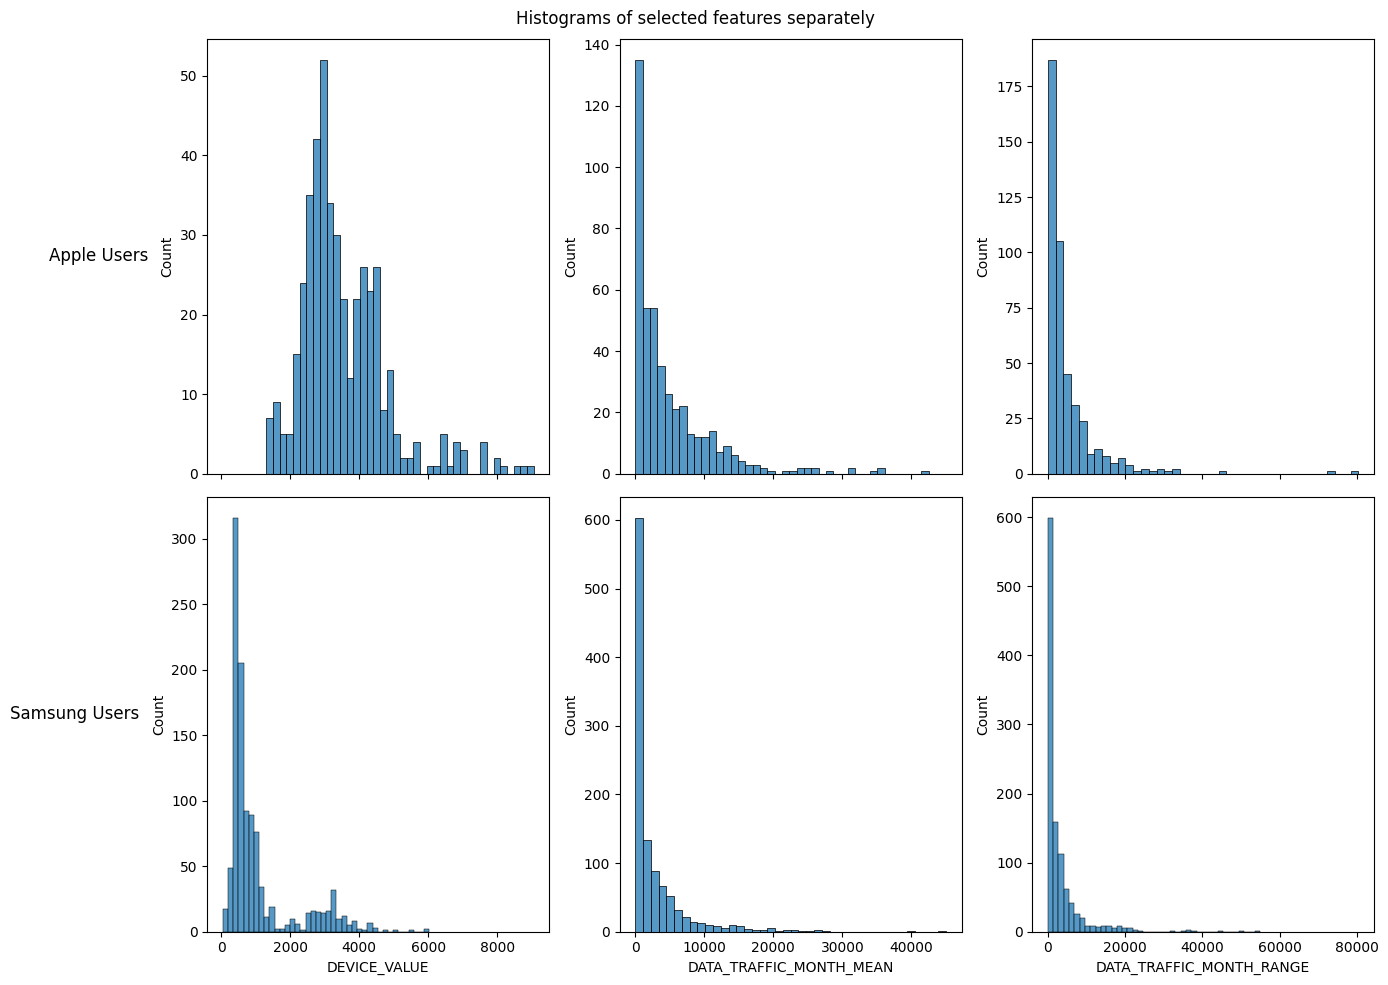

In [142]:
fig, axs = plt.subplots(2,3, figsize=(14,10), sharex='col')

for i, sel in enumerate(selection):
    sns.histplot(apple_df[sel], kde=False, ax=axs[0][i], bins=40)
    sns.histplot(samsung_df[sel], kde=False, ax=axs[1][i], bins=40)

axs[0][0].annotate('Apple Users', xy=(0, 0.5), xytext=(-axs[0][0].yaxis.labelpad - 5, 0),
                xycoords=axs[0][0].yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

axs[1][0].annotate('Samsung Users', xy=(0, 0.5), xytext=(-axs[1][0].yaxis.labelpad - 5, 0),
                xycoords=axs[1][0].yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.suptitle('Histograms of selected features separately')
fig.tight_layout()
plt.show()

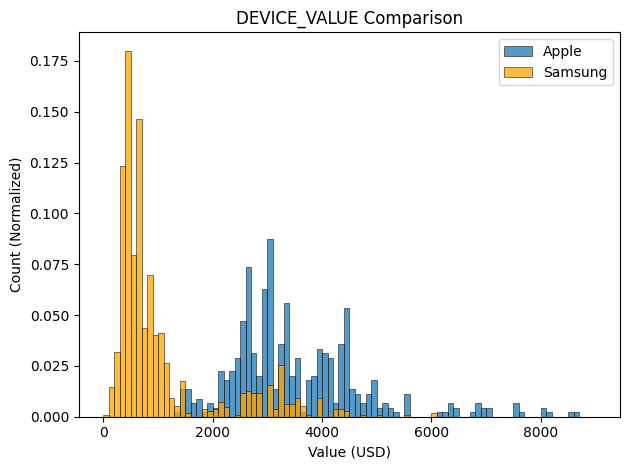

In [150]:
ax = plt.subplot()

ax.set(title='DEVICE_VALUE Comparison', xlabel='Value (USD)', ylabel='Count (Normalized)') # normalized as if it was a probability

# very ugly but it is a mess otherwise
sns.histplot(apple_df['DEVICE_VALUE'], kde=False, ax=ax, label='Apple', stat='probability', bins=range(0, 9100, 100))
sns.histplot(samsung_df['DEVICE_VALUE'], kde=False, ax=ax, label='Samsung', stat='probability', bins=range(0, 9100, 100), color='orange')

plt.legend()
plt.tight_layout()
plt.show()

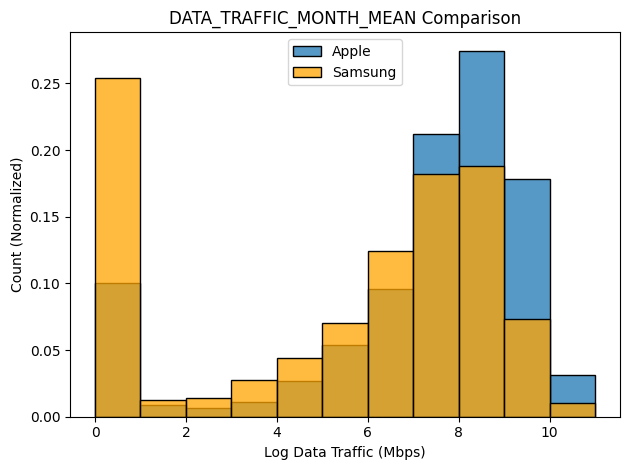

In [171]:
ax = plt.subplot()

ax.set(title='DATA_TRAFFIC_MONTH_MEAN Comparison', xlabel='Log Data Traffic (Mbps)', ylabel='Count (Normalized)')

sns.histplot(np.log(apple_df['DATA_TRAFFIC_MONTH_MEAN']+1), kde=False, ax=ax, label='Apple', stat='probability', bins=range(0, 12, 1))
sns.histplot(np.log(samsung_df['DATA_TRAFFIC_MONTH_MEAN']+1), kde=False, ax=ax, label='Samsung', stat='probability', bins=range(0, 12, 1), color='orange')

plt.legend()
plt.tight_layout()
plt.show()

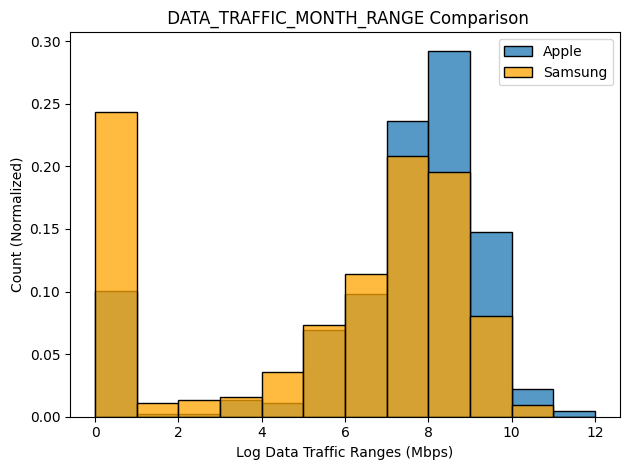

In [174]:
ax = plt.subplot()

ax.set(title=' DATA_TRAFFIC_MONTH_RANGE Comparison', xlabel='Log Data Traffic Ranges (Mbps)', ylabel='Count (Normalized)')

sns.histplot(np.log(apple_df['DATA_TRAFFIC_MONTH_RANGE']+1), kde=False, ax=ax, label='Apple', stat='probability', bins=range(0, 13, 1))
sns.histplot(np.log(samsung_df['DATA_TRAFFIC_MONTH_RANGE']+1), kde=False, ax=ax, label='Samsung', stat='probability', bins=range(0, 13, 1), color='orange')

plt.legend()
plt.tight_layout()
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on the differences you found between these two groups of users.</font>

In the first selected feature which represents the device value we can see quite clearly that the Samsung phones follow (aproximately) a bimodal normal distribution that tends to be way cheaper than the Apple one, which has a much higher mean and a heavier right-tail.

In the second and third features, which are kind of related, we are analysing the data traffic of the six months prior to the device purchase, which can give us an idea about the typical phone usage of the different populations. We can see in the first plot that generally Samsung users tend to have less data traffic, while most of the Apple user base have more usage in average (we can see that the right tail of the Apple distribution weights significantly more than its Samsung counterpart). In addition to that, in the second plot we can see that the traffic ranges also differ quite significantly: the Samsung users have a more consistent data usage overall, while the Apple users, similarly as before, have a bigger range of different usages.

To conclude this second analysis, Samsung users generally have a lower data usage, however they are more consistent with it; while the Apple users generally have a higher data usage but that usage might differ a lot from month to month.

# DELIVER (individually)

Remember to read the section on "delivering your code" in the [course evaluation guidelines](https://github.com/chatox/data-mining-course/blob/master/upf/upf-evaluation.md).

Deliver a zip file containing:

* This notebook

## Extra points available

For more learning and extra points, remember what you learned in machine learning and create a simple [decision tree model](https://scikit-learn.org/stable/modules/tree.html) having as input variables:

1. PREVIOUS\_DEVICE\_MODEL
1. PREVIOUS\_DEVICE\_BRAND
1. MONTHS\_LAST\_DEVICE

And as output variable `PURCHASED_DEVICE_MANUFACTURER`. Measure the accuracy of this 3-variables model. Then, add two more variables, of your own choice, that improve the classification accuracy. Measure the accuracy of this 5-variables model.


**Note:** if you go for the extra points, add ``<font size="+2" color="blue">Additional results: model purchased device</font>`` at the top of your notebook.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>